In [1]:
import numpy as np


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def crank_nikolson(c, v):
    dx = 0.05
    dt = 0.005
    # Range of X and T
    rX = 1
    rT = 1
    m = int(rX/dx)
    n = int(rT/dt)
    X = np.linspace(0, rX, m+1)
    Y = np.linspace(0, rT, n)
    U = np.zeros((n, m+1), dtype=np.float32)  # U at nth iteration
    U[:, 0] = 0
    U[:, m] = 0
    U[0,:] = np.sin(np.pi*X)
    for k in range(1, n-1):
        A = [v/dx**2 + c/(2*dx) for i in range(1, m)]
        B = [-(2*v)/(dx**2) - 2/dt for i in range(1, m)]
        C = [v/dx**2 - c/(2*dx) for i in range(1, m)]
        D = [U[k-1, j]*((2*v)/(dx**2) - 2/dt) - U[k-1, j-1]*((v)/(dx**2) + c/(2*dx)) - U[k-1, j+1]*((v)/(dx**2) - c/(2*dx)) for j in range(1,m)]
        D[0] = D[0] - U[k, 0]*(v/(dx**2) + c/(2*dx))
        D[m-2] = D[m-2] - U[k,m]*((v/dx**2) - c/(2**dx))
        U[k, 1:m ] = np.array(thomas_algorithm(A, B, C, D))
    return U

In [4]:
def thomas_algorithm(a, b, c, d):
    """
    Solves the Tridiagonal Linear System
          --             -- -- --   -- --
          |b_1 c_1        | |f_1|   |d_1|
          |a_2 b_2 c_2    | | . |   | . |
          |    a_3 . . .  | | . | = | . |
          |               | |   |   |   |
          |               | |   |   |   |
          |       a_n b_n | |f_n|   |d_n|
          --             -- -- --   -- --
    """
    assert len(a) == len(b) == len(c) == len(d)
    N = len(c)
    c_ = [None for i in range(N)]
    d_ = [None for i in range(N)]
    f = [None for i in range(N)]
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, N):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    f[N-1] = d_[N-1]
    for i in range(N-2, -1, -1):
        f[i] = d_[i] - c_[i]*f[i+1]

    return f

In [5]:
U1 = crank_nikolson(1, 0.1)
U2 = crank_nikolson(1, 0.5)
U3 = crank_nikolson(1, 1)

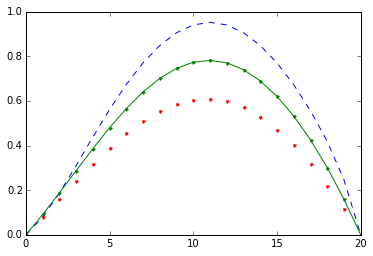

In [6]:
plt.plot(U1[10, :], '--'); plt.plot(U2[10, :], '.-'); plt.plot(U3[10, :], '.')